In [1]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

In [2]:
ap = argparse.ArgumentParser()


In [3]:
ap.add_argument("-f", "--first", required=True,
	help="first input image")
ap.add_argument("-s", "--second", required=True,
	help="second")


_StoreAction(option_strings=['-s', '--second'], dest='second', nargs=None, const=None, default=None, type=None, choices=None, help='second', metavar=None)

In [4]:

imageA = cv2.imread('C:\\Users\\E005347\\Desktop\\pic\\screen1.jpg')
imageB = cv2.imread('C:\\Users\\E005347\\Desktop\\pic\\screen2.jpg')


In [5]:
imageA.shape

(696, 1366, 3)

In [6]:
resizedA = cv2.resize(imageA,(1366,696))
resizedB = cv2.resize(imageB,(1366,696))

In [7]:
 
# convert the images to grayscale
grayA = cv2.cvtColor(resizedA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(resizedB, cv2.COLOR_BGR2GRAY)

In [8]:
import matplotlib.pyplot as plt
plt.imshow(resizedA)

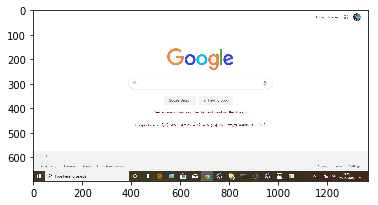

In [9]:

plt.imshow(imageA)

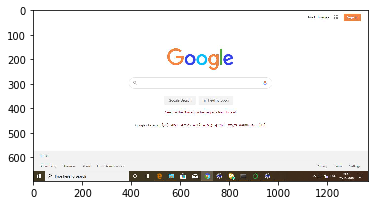

In [10]:

plt.imshow(imageB)

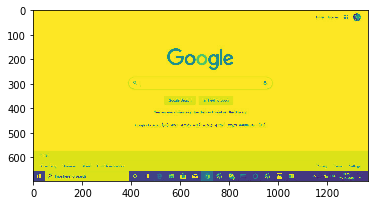

In [11]:
plt.imshow(grayA)

In [12]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

C:\Users\E005347\.conda\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


SSIM: 0.9772785650089091


In [22]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
cv2.THRESH_BINARY_INV )[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

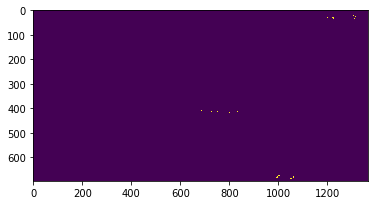

In [23]:
plt.imshow(thresh)

In [24]:

for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
 



In [25]:

cv2.imshow("Original", imageA)
cv2.imshow("Modified", imageB)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)


In [30]:
cv2.imshow("Diff", diff)

In [31]:
cv2.imwrite('C:\\Users\\E005347\\Desktop\\pic\\differed_img.png', diff)

True

In [32]:
cv2.imwrite('C:\\Users\\E005347\\Desktop\\pic\\modified_img.png', imageB)

True

In [33]:
cv2.imwrite('C:\\Users\\E005347\\Desktop\\pic\\original_img.png', imageA)

True

In [34]:
cv2.imwrite('C:\\Users\\E005347\\Desktop\\pic\\threshold_img.png', thresh)

True